Read and understand the data

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
plt.style.use("seaborn-dark-palette")

In [3]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Insights:

 1.Data has no missing values
 
 2.It has 4 float type and 1 categorical type columns 
 
 3.Id will not be usefule hence let's drop it

In [9]:
df.drop(['Id'], axis=1, inplace=True)

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.Species.value_counts (normalize =True)*100

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: Species, dtype: float64

Insights:
 Each class of species have equal sample and is distributed equally

EDA

In [ ]:
# Univariate Analysis

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

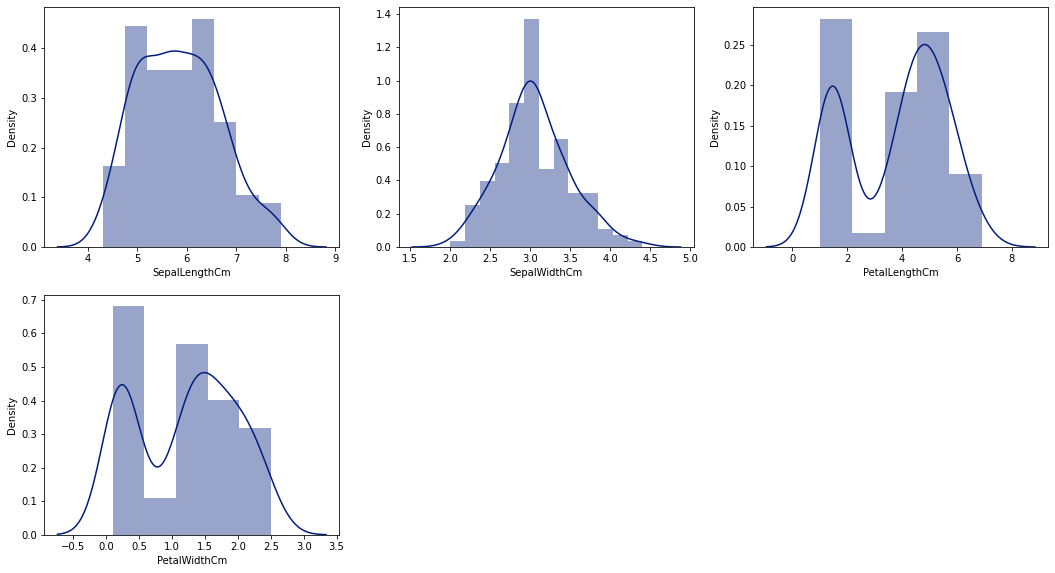

In [26]:
# Checking for distribution

num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=[18,15])
for n,col in enumerate(num_cols):
  plt.subplot(3,3,n+1)
  sns.distplot(df[col])

Insights:

Data distribution in Speal Length and Width seems normally distributed.

In [ ]:
# Bi / Mutivariate Analysis

<Figure size 720x576 with 0 Axes>

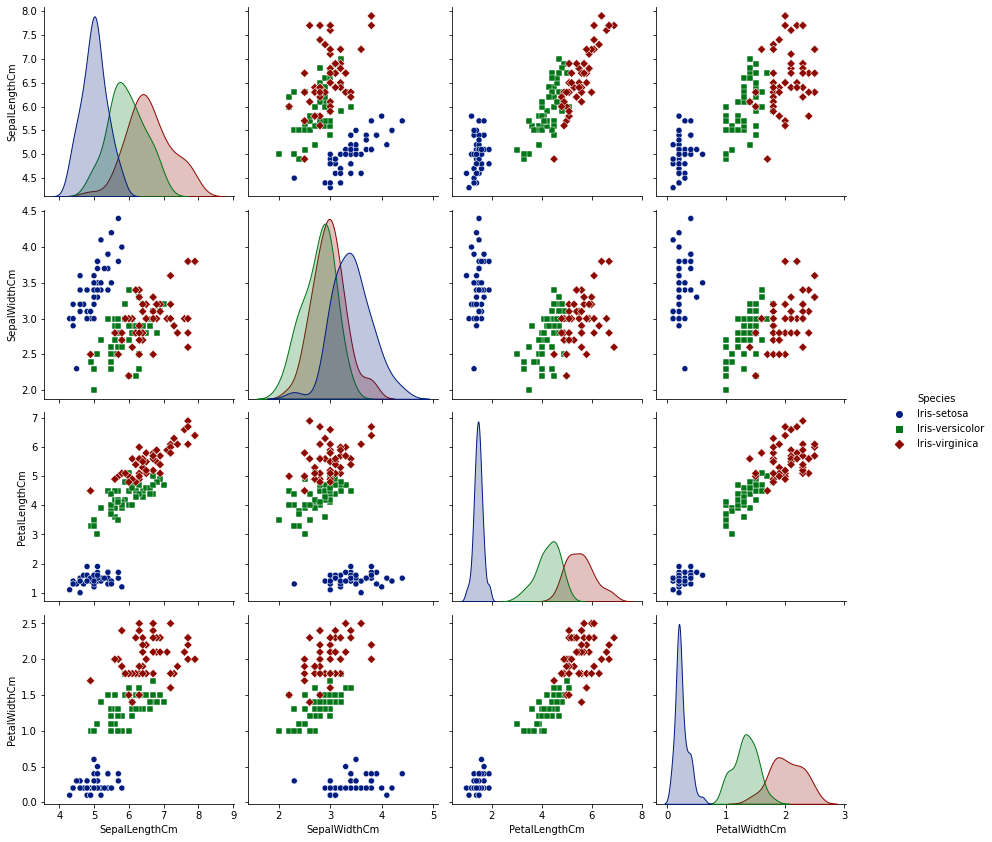

In [27]:
plt.figure(figsize=[10,8])
g=sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']],
               vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               hue="Species",
               markers = ['o', 's', 'D'])
g.fig.set_size_inches(14,12)
plt.show()

Insights:

1.Petal Length and Width are positively correlated to each other.
2.The setosa species is the most easily distinguishable because of its small feature size.
3.The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.

In [28]:
import plotly
import plotly.express as px

In [29]:
#checking the spread of individual feature of all three Iris species (Sepal Length)

fig = px.box(df, x='Species', y='SepalLengthCm', points = "all", 
             title = "Sepal Length w.r.t Iris Species", width= 1000, height = 700)
fig.show()

In [30]:
# Checking the spread of individual feature of all three Iris Species (Sepal width)
fig = px.box(df, x='Species', y='SepalWidthCm', points = "all", 
             title = "Sepal width w.r.t Iris Species", width = 1000, height = 700)
fig.show()

Insights:

1.Iris-setso seems to have the smallest Sepal Length followed by Versicolor and then Virginica. 
2.Iris-Versicolor seems to have the smallest Sepal Width followed by Virginica and then Setosa.

In [31]:
# checking the spread of individual feature of all three Iris Species (Petal Length)

fig = px.box(df, x='Species', y='PetalLengthCm', points= "all", 
             title = "Petal Lenght w.r.t Iris Species", width = 1000, height = 780)

fig.show()

In [32]:
# checking the spread of individual feature of all three Iris Species (Petal Length)

fig = px.box(df, x='Species', y='PetalWidthCm', points= "all", 
             title = "Petal Width w.r.t Iris Species", width = 1000, height = 780)

fig.show()

Insights:
1.The Petals features of all species seems symmetrical

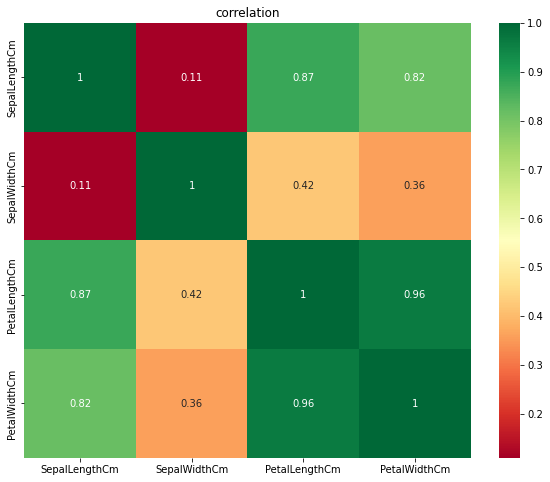

In [34]:
#Checking for correlations

plt.figure(figsize=(10,8))
sns.heatmap(df.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('correlation')
plt.show()

Insights:

1.We can also witness Sepal Length being strongly porrelated to Petal Length and width.

2.Whereas Sepal Width is moderately correlating to both Petal Length and width.

Text(0.5, 1.0, 'Cluster Heatmap')

<Figure size 720x432 with 0 Axes>

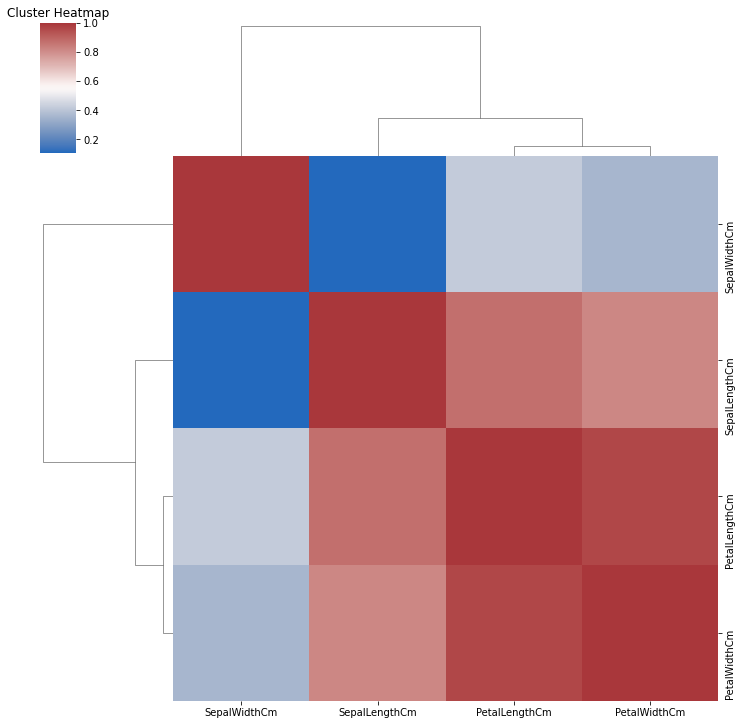

In [36]:
plt.figure(figsize=(10,6))
sns.clustermap (df.corr().abs(), cmap='vlag', method="single") 
plt.title('Cluster Heatmap')

Insights:

1.The dendrograms along the sides show how the variables and the rows are independently clustered.
2.The heat map shows the data value for each row and column (possibly standardized so they all fit in the same range). 
3.Any patterns in the heat map may indicate an association between the rows and the columns.

Prepare the data for modelling

In [ ]:
# checking for outliers

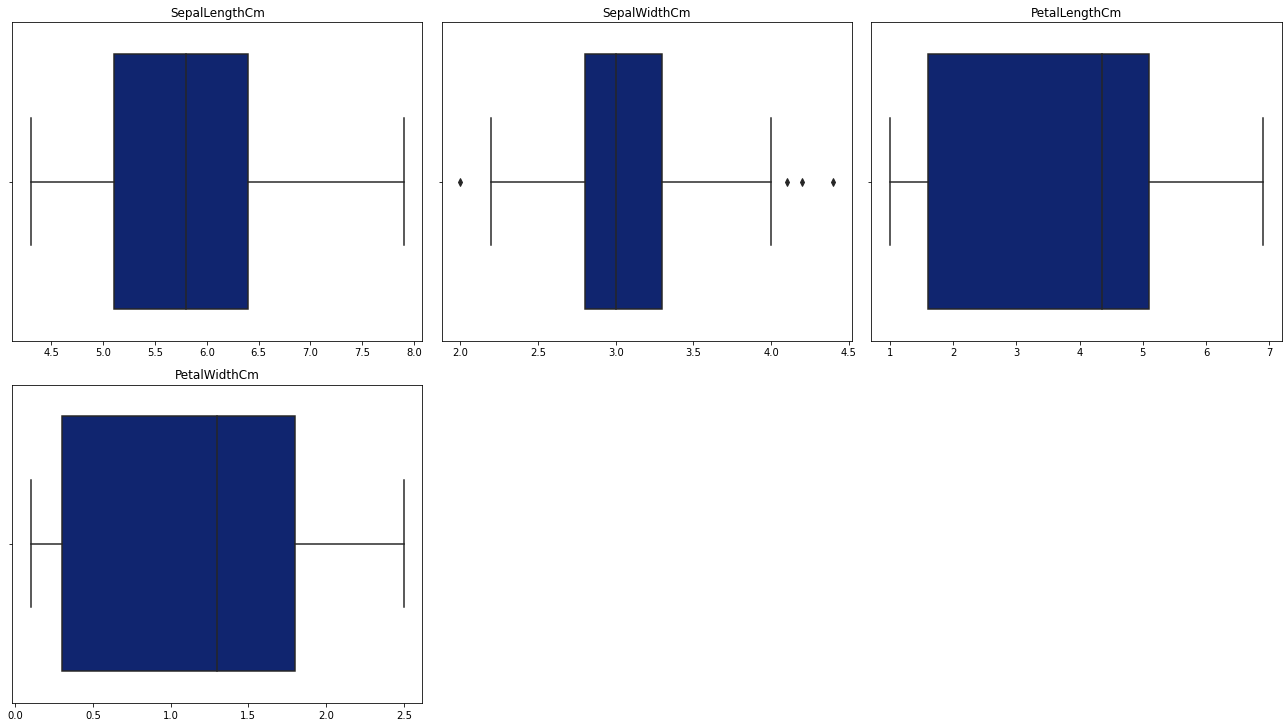

In [38]:
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 
plt.figure(figsize=[18,15])
for n,col in enumerate(num_cols):
  plt.subplot(3,3,n+1)
  sns.boxplot(df[col], orient = "h")
  plt.xlabel("")
  plt.ylabel("")
  plt.title(col) 
  plt.tight_layout()

Insights:

• We can proceed further to scale the attributes as we do not have much outliers in the dataset

In [43]:
#rescaling the attributes using standarascaler

import sklearn
from sklearn.preprocessing import StandardScaler

#subsetting the of to scaling variables
df_scaled = df[[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

#instantiate an object called scaler
scaler = StandardScaler()

#fit transform
df_scaled = scaler.fit_transform(df_scaled)
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [44]:
df_scaled.shape

(150, 4)

In [46]:
# converting it into dataframe as it is in the Numpy array form

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['SL', 'SW', 'PL', 'PW']
df_scaled.head()

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

1.If the value is between (0.01, 0.3), the data is regularly spaced.
2.If the value is around 0.5, it is random.
3.If the value is between (0.7, 0.99), it has a high tendency to cluster.

In [65]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
  d = X.shape[1] 
  #d= len(vars) # columns
  n = len(X) # rows
  m= int(0.1*n) 
  nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
  rand_X = sample(range(0, n, 1), m)
  ujd = []
  wjd = []
  for j in range(0, m):
    u_dist,_= nbrs.kneighbors(uniform(np.amin(X,axis=0), np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True) 
    ujd.append(u_dist[0][1])
    w_dist,_=nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
    wjd.append(w_dist[0][1])
  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H): 
    print (ujd, wjd)
    H=0
  return H

In [66]:
#Use the Hopkins Statistic function by passing the above dataframe as a paranter 
hopkins(df_scaled)

0.7878528196043388

Insights:
• As seen our data has a high tendency to cluster

4.K-Means Modelling

In [68]:
from sklearn.cluster import KMeans

In [69]:
#k-means with some arbitrary k

kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 0) 
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=0)

In [70]:
kmeans.labels_

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1], dtype=int32)

In [71]:
len(kmeans.labels_)

150